# Visualizing Earnings Based On College Majors


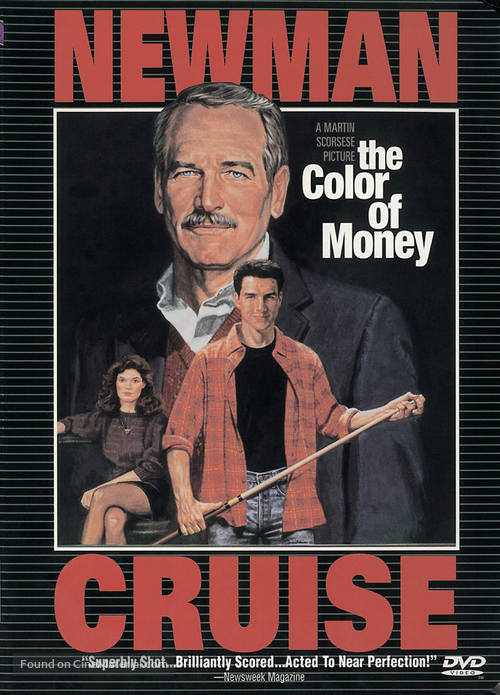

## Introduction

The goal our work - preparing  and visualizing  data  from a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their <a href="https://github.com/fivethirtyeight/data/tree/master/college-majors" target="_blank">Github repo</a>.



Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.


# 1. Data wrangling
Let's setup the environment by importing the libraries we need and running the necessary Jupyter magic so that plots are displayed inline.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

Convert  the dataset into a DataFrame  from csv and  short exploring data in it. For  shortness and visual evaluation rows contains zero values I using method info() instead descibe():

In [2]:
recent_grads = pd.read_csv("data/recent-grads.csv")
# View first row
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                  2339.0
Men                                    2057.0
Women                                   282.0
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                    0.018381
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
# View first five rows
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
# View last five rows
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
# View summary statistics for all of the numeric columns and defining columns contalins zero values
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

As we see all columns contains 173 non-null values except   columns  **No 3 'Total',   No 4 'Men',  and  No 5 'Women', No 7 'ShareWomen'** which contains **172 non-null** values. 
Extract the number of rows in  recent_grads and assign  this value to raw_data_count.

In [6]:
raw_data_count =  recent_grads.shape[0]
raw_data_count

173

Drop rows containing missing values and assign the resulting DataFrame back to recent_grads

In [7]:
# Drop rows containig missing values
recent_grads = recent_grads.dropna()
# Assign new count rows and view it
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

Check recent_grads with 

In [8]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

Create checksum for columns Total  and Sample_size  

In [9]:
recent_grads_total = recent_grads['Total'].sum()
recent_grads_sample = recent_grads['Sample_size'].sum()
print ("Graduated Total: {:,}.  Sample Size: {:,}. Ratio: {:.3%} ".format(
        recent_grads_total.sum(), recent_grads_sample.sum(),
        recent_grads_sample.sum()/recent_grads_total.sum()) )

Graduated Total: 6,771,654.0.  Sample Size: 61,566. Ratio: 0.909% 


As we wee all columns cleaned dataframe **recent_grads** contains equal non-null values - 172, one row contained missing values and was dropped.

Before plot graphics let's understand the essence our recent_grads dataset. 

I didn't find original report and method how prepare data except for <a href="https://www.census.gov/newsroom/releases/archives/education/cb12-196.html" target="_blank"> CB12-196 press release Choice of College Major Can Mean Millions Over Career, Census Bureau Reports</a> from  U.S. Census Bureau. 

Pivot tables with detailed information for this survey you can download from here (as pdf file)
<a href="https://cew.georgetown.edu/wp-content/uploads/2014/11/whatsitworth-complete.pdf" target="_blank">
What’s it Worth?: The Economic Value of College Majors and their Visualizing Earnings for students  2010 - 2012 years of graduated.</a>

Lets create ether one datasets where data will be grouped by column  'Major_category' which get us general map of data by Major category. As we see are 16 major category for specialization.


In [10]:
# Create new dataset grouped by category
recent_grads_group = recent_grads.groupby(recent_grads['Major_category'])

# Create recent_grads_stat1 for veiwing recent_grads_group
recent_grads_stat1 = recent_grads_group[['Total', 'Men', 'Women',\
                                         'Sample_size']].sum().sort_values(by=['Total'], ascending=False).\
                                        style.format("{:,}")
recent_grads_stat1

,Total,Men,Women,Sample_size
Major_category,,,,
Business,"1,302,376.0","667,852.0","634,524.0","15,505"
Humanities & Liberal Arts,"713,468.0","272,846.0","440,622.0","5,340"
Education,"559,129.0","103,526.0","455,603.0","4,742"
Engineering,"537,583.0","408,307.0","129,276.0","4,926"
Social Science,"529,966.0","256,834.0","273,132.0","4,581"
Psychology & Social Work,"481,007.0","98,115.0","382,892.0","3,180"
Health,"463,230.0","75,517.0","387,713.0","3,914"
Biology & Life Science,"453,862.0","184,919.0","268,943.0","2,317"
Communications & Journalism,"392,601.0","131,921.0","260,680.0","4,508"


Create checksum for columns Total and Sample_size for recent_grads_group:

In [11]:
recent_grads_group_total = recent_grads_group['Total'].sum()
recent_grads_group_sample = recent_grads_group['Sample_size'].sum()
print ("Graduated Total (grouped): {:,}.  Sample Size (grouped): {:,},\
Ratio (grouped): {:.3%} ".format(recent_grads_group_total.sum(), recent_grads_group_sample.sum(),
        recent_grads_group_sample.sum()/recent_grads_group_total.sum() ))

Graduated Total (grouped): 6,771,654.0.  Sample Size (grouped): 61,566,Ratio (grouped): 0.909% 


As we see checksum for ecent_grads and recent_grads_group_total are equal, hense I suppose that in 2010 - 2012 year total  number of people graduated the college was 6,771,654 and survey  described less than one percent from this total number recently graduated. Hence we must  taking into account such a small sample, we must understand that the data given below are not reliable and have descriptive character.

# 2. Visualizing relationships between 2 variables by scatter plots 
Let's create scatter plots for next pairs of value (first values - x-axis, second values - y-axis,) using  <a <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html" target="_blank">pandas.DataFrame.plot </a> method.
* 1.Sample_size and Median
* 2.Sample_size and Unemployment_rate
* 3.Full_time and Median
* 4.Men and Unemployment_rate 
* 5.Women and Unemployment_rate 
* 6.Men and Median
* 7.Women and Median

I wouldn't plot ShareWomen and Unemployment_rate, and replace it by Men and Unemployment_rate and Women and Unemployment_rate.

Using these plots, we try to answer  by three questions below:

* Is there any link between the number of full-time employees and median salary?
* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?


**1.Plot for Sample_size and Median:**

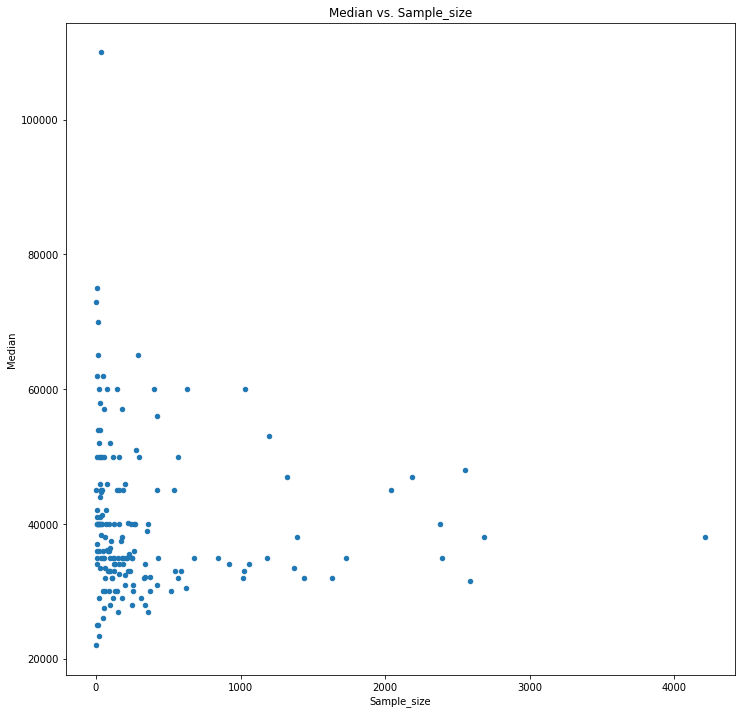

In [12]:
ax = recent_grads.plot(x='Sample_size', y='Median', kind='scatter',figsize=(12,12))
ax.set_title('Median vs. Sample_size');

A quick glance at this figure shows that there’s no significant correlation  between the Median and Sample_size but we see that most survey recently graduated earning yearly  less or equal 40K USD. 

**2. Plot Sample_size vs Unemployment_rate**

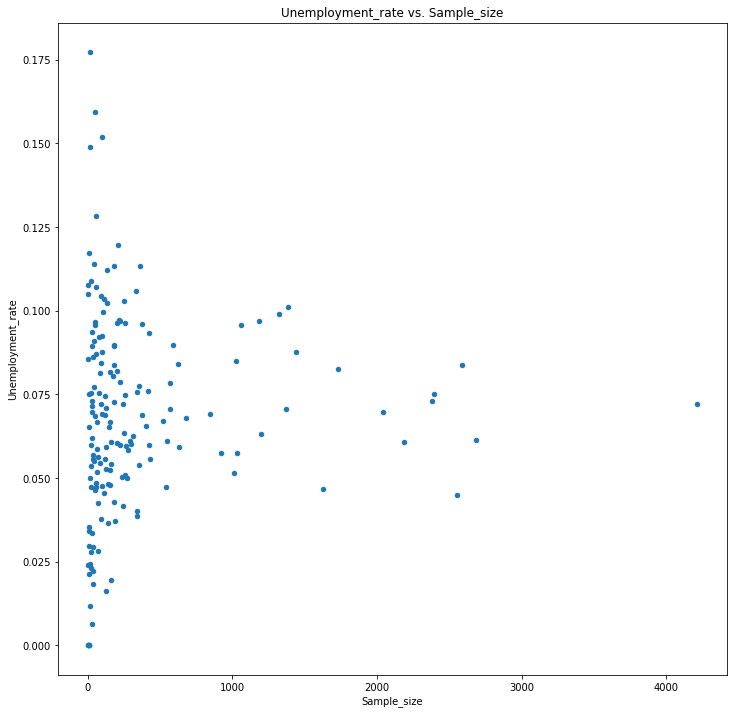

In [13]:
ax = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', figsize=(12,12))
ax.set_title('Unemployment_rate vs. Sample_size');

A quick glance at this figure shows that there’s no significant correlation between the Unemployment_rate and Sample_size.

**3.Plot Full_time vs Median**

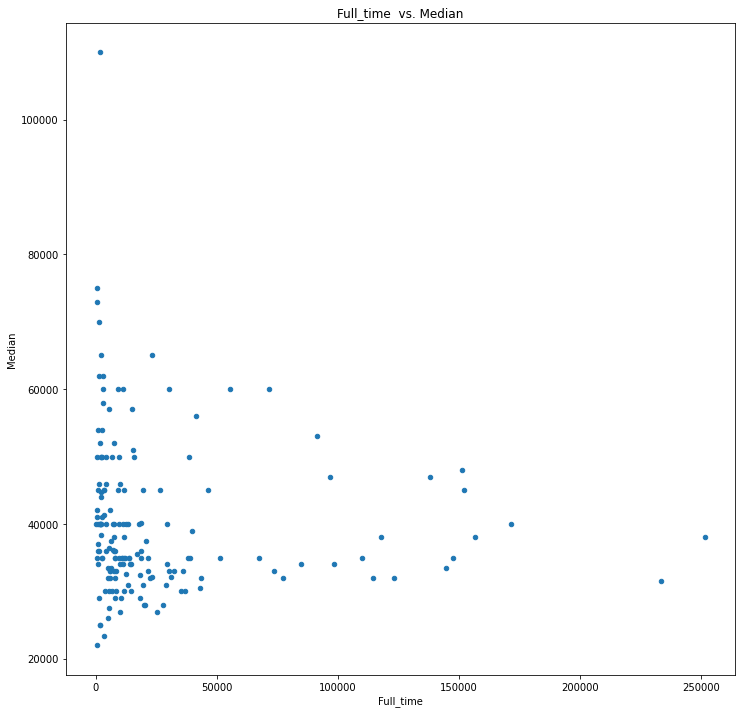

In [14]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter', figsize=(12,12))
ax.set_title('Full_time  vs. Median');

A quick glance at this figure shows that there’s no significant correlation between Full_time and Median. Dispersion seems by Sample_size vs Median -  recently graduated work full or part time  - yearly earning   less or equal 40K USD. 


**4.Plot  Men vs Unemployed**

**5. Plot  Women vs Unemployed**

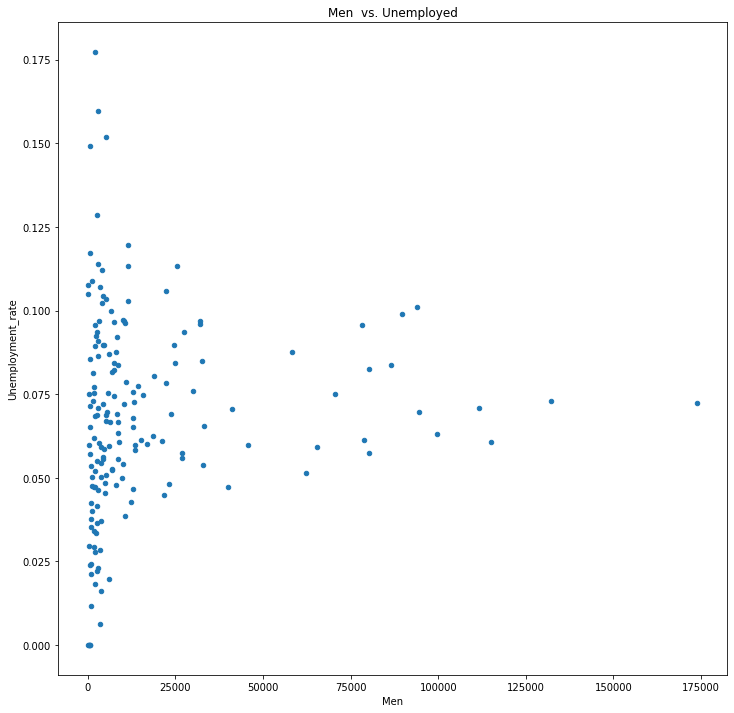

In [15]:
ax = recent_grads.plot(x='Men', y='Unemployment_rate', kind='scatter', figsize=(12,12))
ax.set_title('Men  vs. Unemployed');

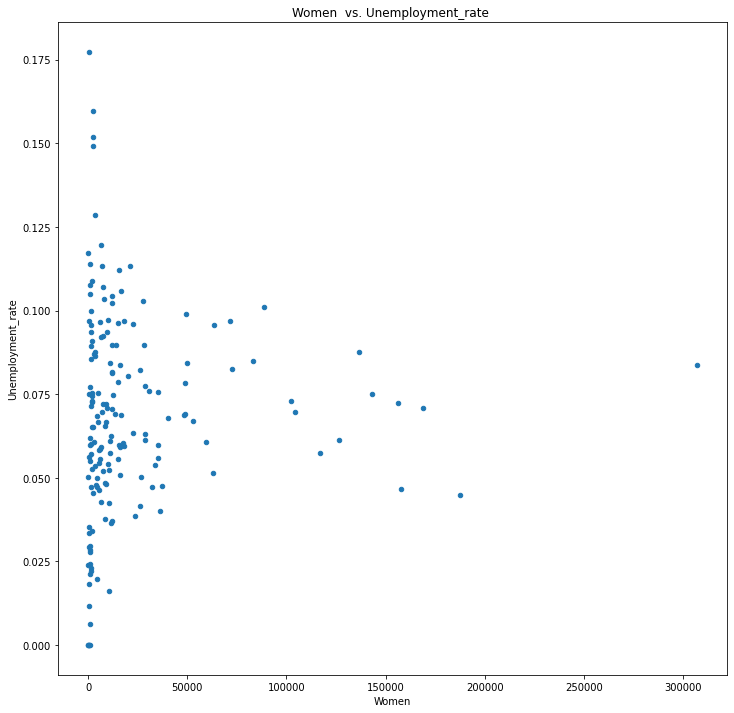

In [16]:
ax = recent_grads.plot(x='Women', y='Unemployment_rate', kind='scatter', figsize=(12,12))
ax.set_title('Women  vs. Unemployment_rate ');

A quick glance at these figure shows that there’s no significant correlation between Man and Women vs Unemployment_rate . Dispersion in lef part seems for either, but  x-axis have greater values for women - 300 000 instead 175 000 for man.


**6.Plot Men vs Median***

**7. Plot Women vs Median**

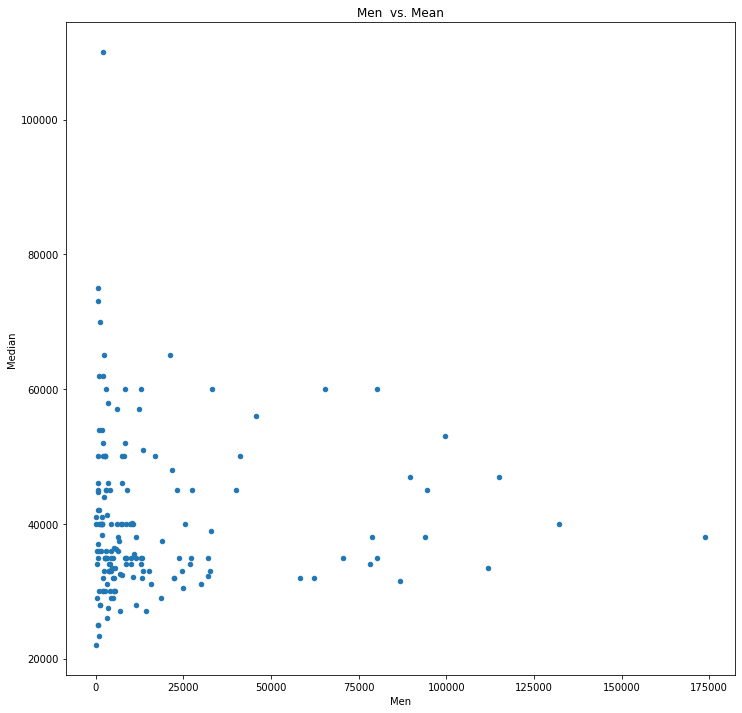

In [17]:
ax = recent_grads.plot(x='Men', y='Median', kind='scatter', figsize=(12,12))
ax.set_title('Men  vs. Mean');

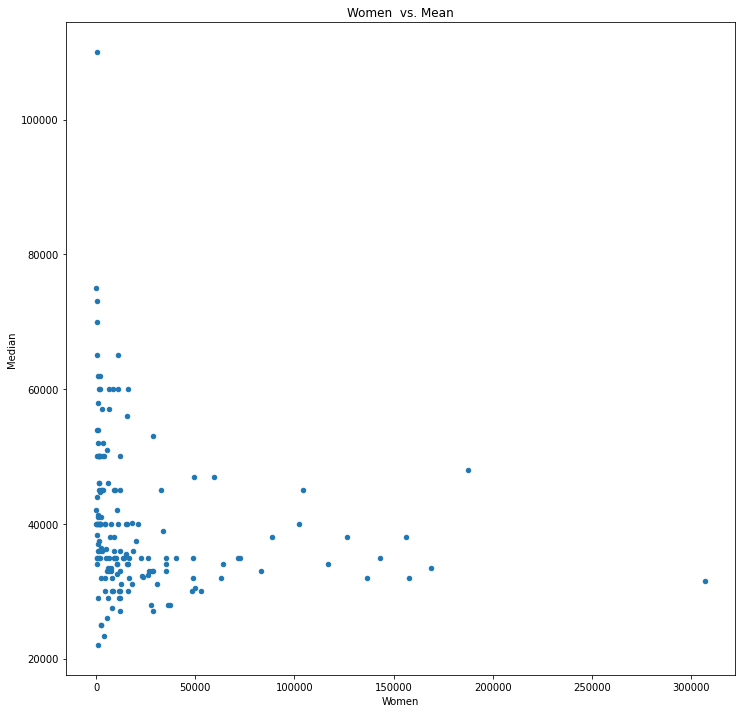

In [18]:
ax = recent_grads.plot(x='Women', y='Median', kind='scatter', figsize=(12,12))
ax.set_title('Women  vs. Mean');

A quick glance at these figure shows that there’s no significant correlation between Man and Women vs Mean. Dispersion seem either to each. In other cases  yearly earning for most of recently graduated less or equal 40K USD.

# 3. Pandas histogram

Creating histograms require defining right bins number for optimal visualizations. As we know are most formulas for defining  - Freedman Diaconis, Doana, Scott and etc -  let's compare it's in action using <a href="https://numpy.org/devdocs/reference/generated/numpy.histogram_bin_edges.html" target="_blank">numpy.histogram_bin_edges</a> function. For example I take Median column. 

In [19]:
# Import  column Median to median_arr
median_arr = np.array(recent_grads["Median"])

# Convert lenght of list intervals to numbers of  bins 
bins_auto = len(np.histogram_bin_edges(median_arr, bins = 'auto'))
bins_doane = len(np.histogram_bin_edges(median_arr, bins = 'doane'))
bins_fd = len(np.histogram_bin_edges(median_arr, bins = 'fd'))
bins_scott = len(np.histogram_bin_edges(median_arr, bins = 'scott'))
bins_stone = len(np.histogram_bin_edges(median_arr, bins = 'stone'))
bins_rice = len(np.histogram_bin_edges(median_arr, bins = 'rice'))
bins_sturges = len(np.histogram_bin_edges(median_arr, bins = 'sturges'))
bins_sqrt = len(np.histogram_bin_edges(median_arr, bins = 'sqrt'))

# View bins values for different formula
print('auto = ', bins_auto, ', doane = ', bins_doane, ', fd = ', bins_fd, 
      ", scott = ", bins_scott, ",stone = ", bins_stone,
      ", rice = ", bins_rice, ", sturges =", bins_sturges, 
      ", sqrt =", bins_sqrt)

auto =  22 , doane =  14 , fd =  22 , scott =  14 ,stone =  82 , rice =  13 , sturges = 10 , sqrt = 15


Lets view and estimate histogram for sturges , doane, auto and stone  for making final decision.
Using different bins for Median columns and estimate their precision.

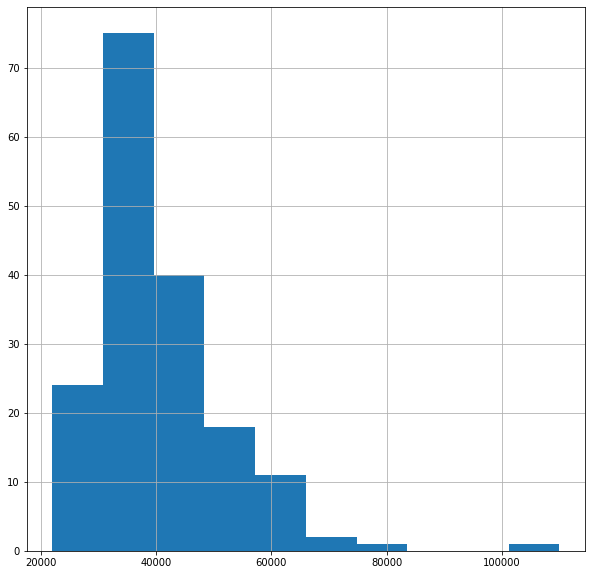

In [20]:
recent_grads['Median'].hist(bins=bins_sturges, figsize=(10,10));

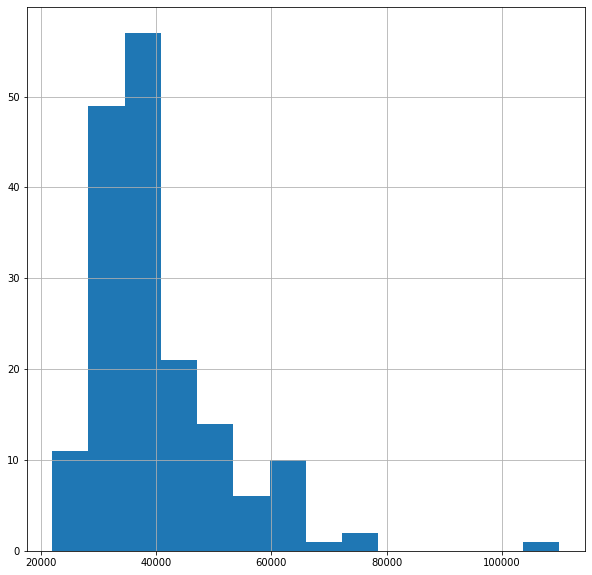

In [21]:
recent_grads['Median'].hist(bins=bins_doane, figsize=(10,10));

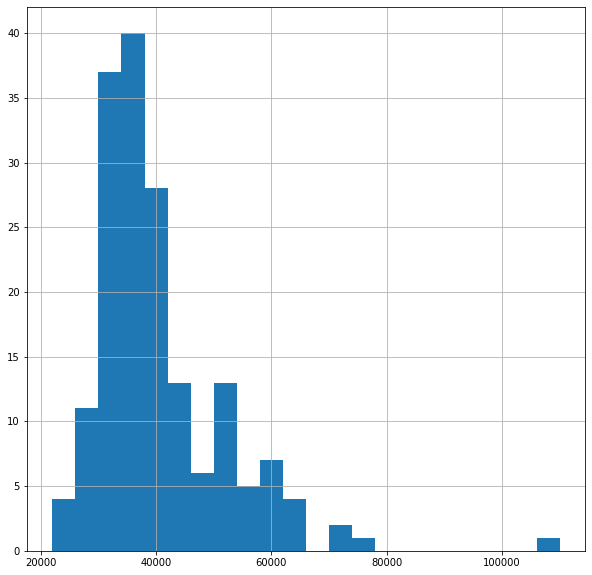

In [22]:
recent_grads['Median'].hist(bins=bins_auto, figsize=(10,10));

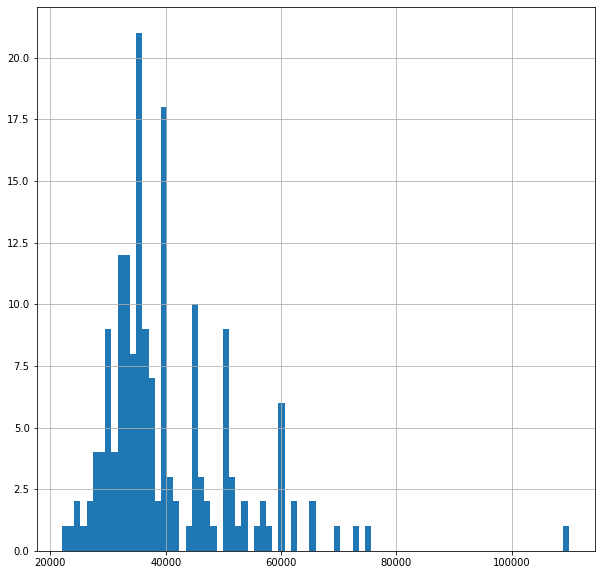

In [23]:
recent_grads['Median'].hist(bins=bins_stone, figsize=(10,10));

As we see, the histogram determined using Stone’s method  is clearly sub-optimal since it highlights random variations that are not representative for  Doane , Sturges and Freedman Diaconi rules. As we see the most of recently graduated annual earing less or equal 40K USD.

Lets plots for other columns and automate this procedure.

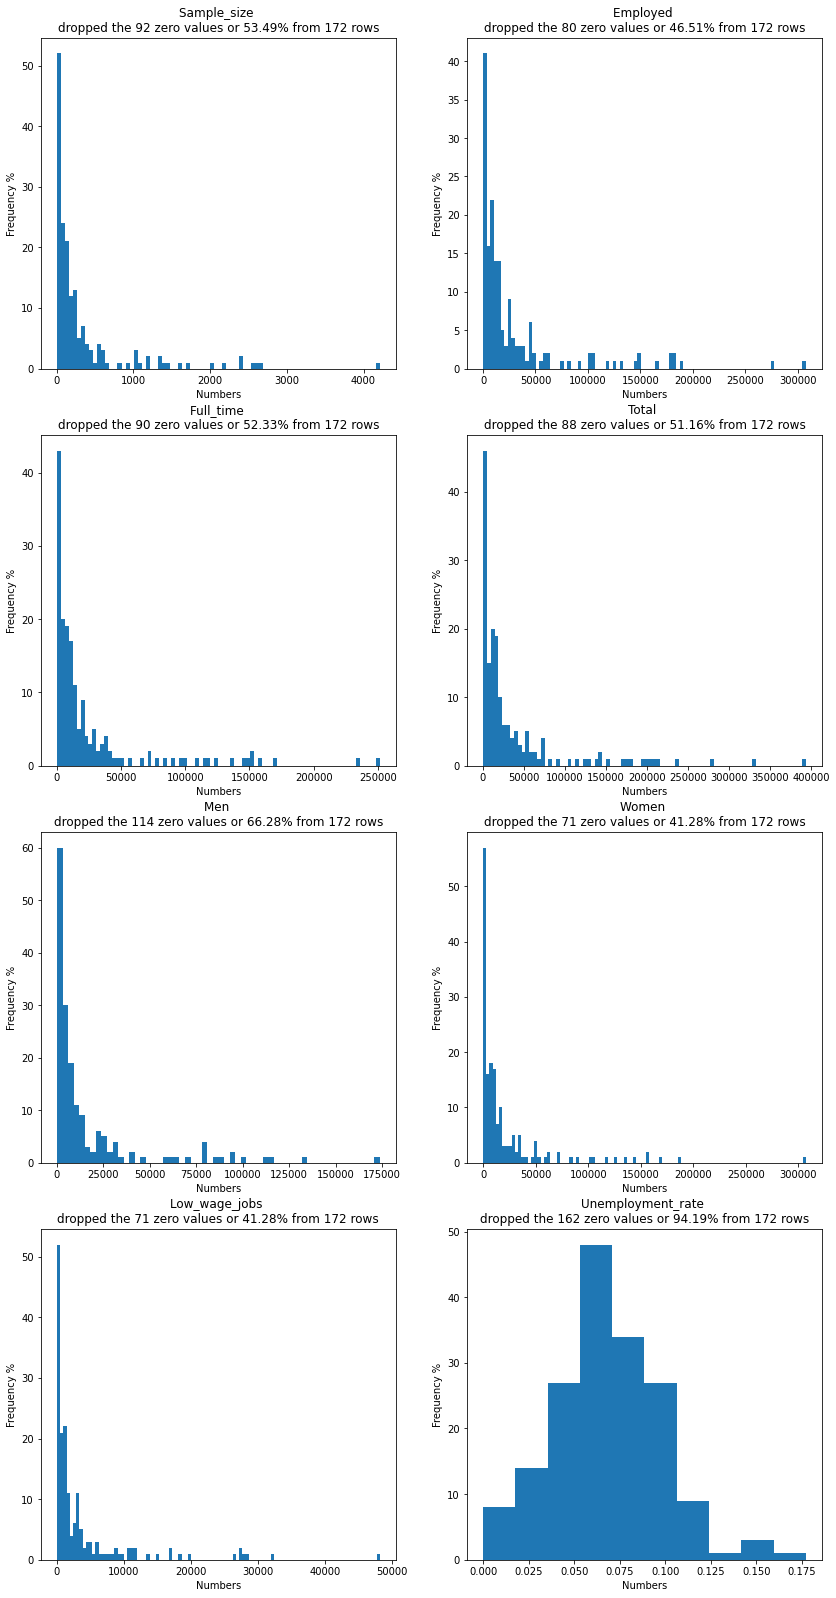

In [24]:
fig, ax = plt.subplots(4, 2, figsize=(14, 28))
# Convert ax nd.array from 2D [4 x 2] to 1D [1 x 8]
ax = ax.ravel()
# Define required columns
columns = ['Sample_size', 'Employed', 'Full_time', 'Total',
            'Men', 'Women', 'Low_wage_jobs', 'Unemployment_rate']

for i, value in enumerate(columns):
    # Get full len on columns incliding zero values
    column_len = len(np.array(recent_grads[value]))
    # Drop zero values in columns- they rasing exceptions for np.histogram_bin_edges function
    # and define optimal bins for each column
    column_array = np.array(recent_grads[value].dropna().values)
    # Calculate bins
    bins_st = len(np.histogram_bin_edges(column_array, bins = 'stone'))
    # Calculate dropped zero values
    dropped = column_len - bins_st 
    # Create title
    title = ("{} \ndropped the {} zero values or {:.2%} from {} rows" ).\
             format(value, dropped, dropped/column_len, column_len)
    # Add subplot
    ax[i].hist(recent_grads[value].dropna().values, bins = bins_st)
    # Set axis labels
    ax[i].set_xlabel("Numbers")
    ax[i].set_ylabel('Frequency %')
    # Set title
    ax[i].set_title(title)

As we see  ratio of zero values in these columns is  in range 40 - 90 percents, that induce  general questions for quality, methodology and authenticity this survey or dataset.

# 4. Pandas Scatter Matrix Plot

Create two scatter_matrix plots - Sample_size vs Median and Sample_size vs Median vs Unemployment_rate

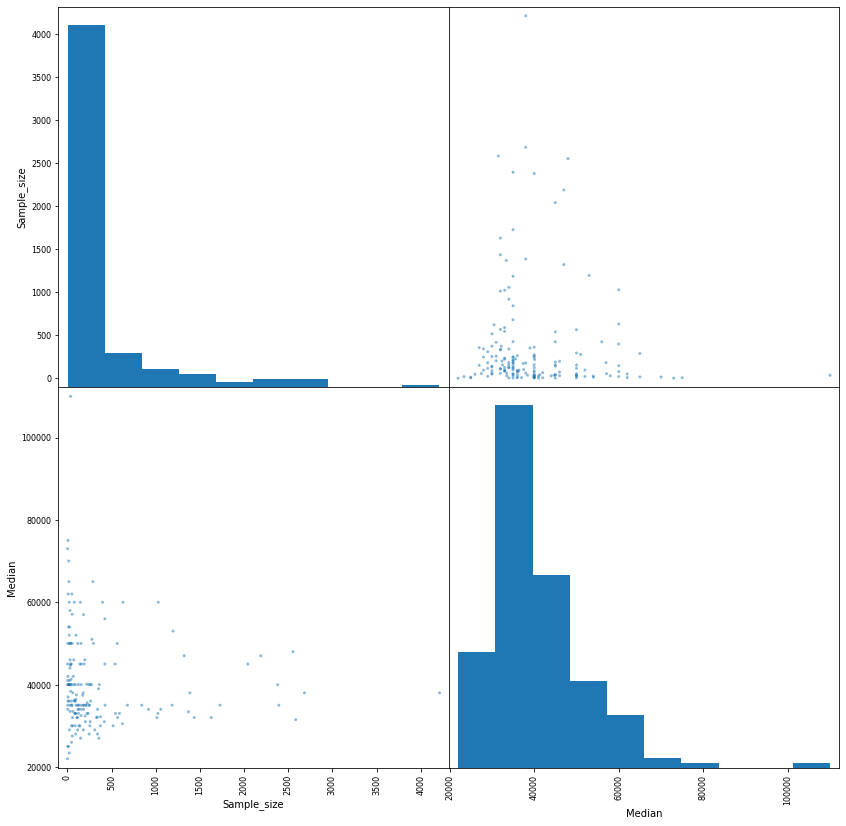

In [25]:
from pandas.plotting import scatter_matrix 
ax = scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(14, 14));

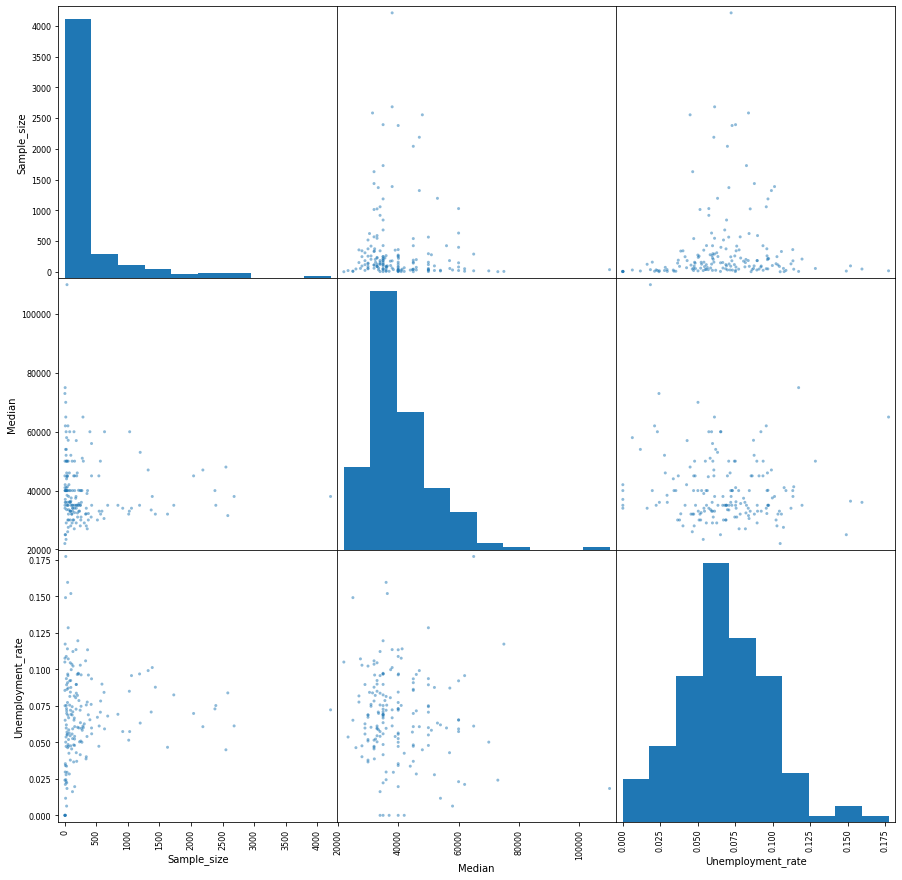

In [26]:
ax = scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(15,15));

As we doesn't see  any correlation between these values.

# 5. Pandas Bar Plots

I think that practical value has ratio between man and women in major category. Let's see it using bar plot.
Early we create data frame recent_grads_group. Lets create bar plot for man and women based by it.

**Grouped bar plots**

**Dispersion for man and women by major category**

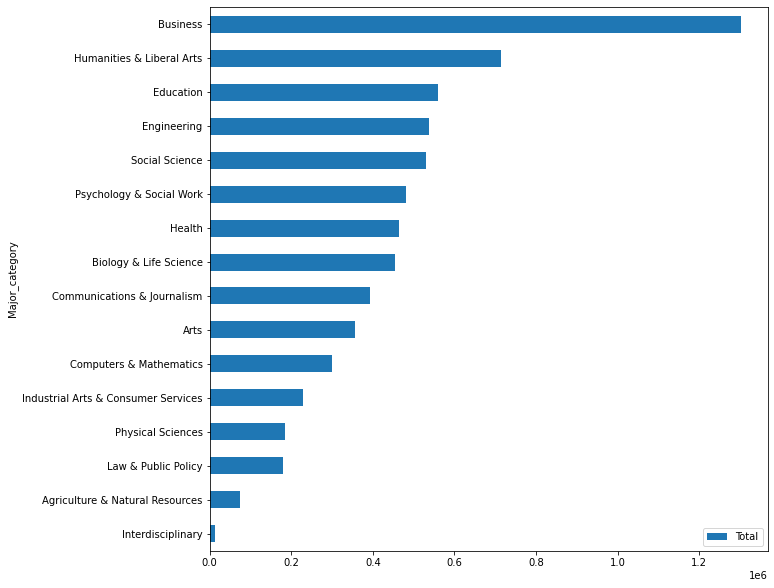

In [27]:
recent_grads_bar_plot = recent_grads_group.sum().sort_values(by=['Total'], ascending=True)
ax = recent_grads_bar_plot[['Total']].plot.barh(figsize=(10,10));

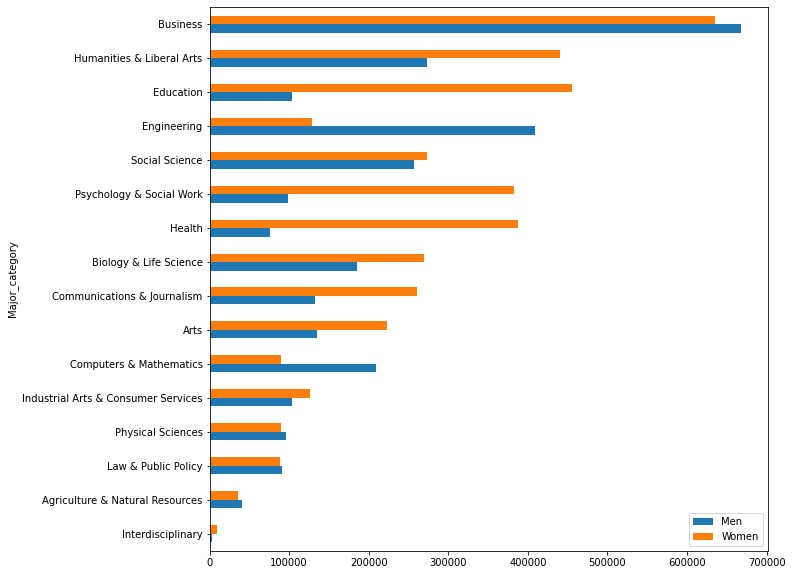

In [28]:
recent_grads_bar_plot = recent_grads_group.sum().sort_values(by=['Total'], ascending=True)
ax = recent_grads_bar_plot[['Men','Women']].plot.barh(figsize=(10,10));

As we see, from recently graduated  women prefer general humanitarian disciplines, that including and business, man  - science, technology, engineering, and mathematics (STEM) which related with high tech.

**Dispersions 25%,median and 75%  annual earing for major categories.*** 

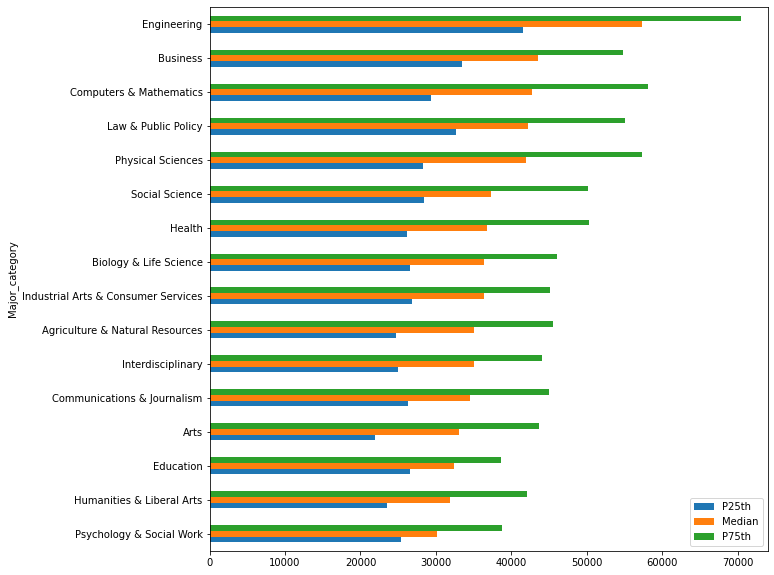

In [29]:
recent_grads_bar_median = recent_grads_group.mean().sort_values(by=['Median'], ascending=True)
ax = recent_grads_bar_median[['P25th','Median','P75th']].plot.barh(figsize=(10,10));

As we see for annual earing for recently graduated  dominate business, law and science, technology, engineering, and mathematics (STEM).

**Boxplots**


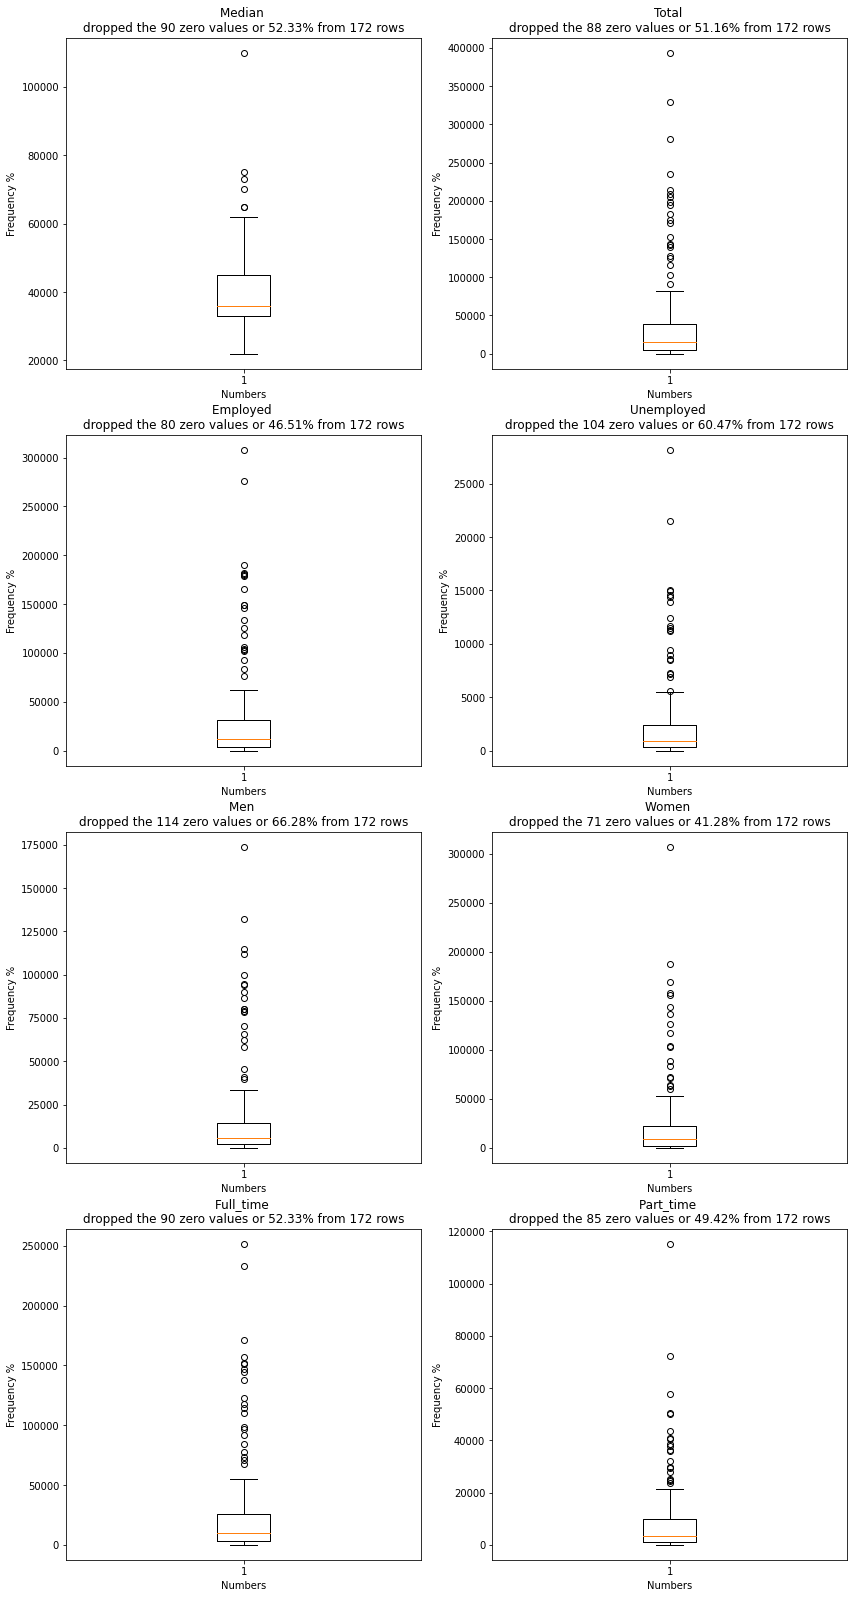

In [30]:
fig, ax = plt.subplots(4, 2, figsize=(14, 28))
# Convert ax nd.array from 2D [4 x 2] to 1D [1 x 8]
ax = ax.ravel()
# Define required columns
columns = ['Median', 'Total', 'Employed', 'Unemployed',
            'Men', 'Women', 'Full_time', 'Part_time' ]

for i, value in enumerate(columns):
    # Get full len on columns incliding zero values
    column_len = len(np.array(recent_grads[value]))
    # Drop zero values in columns- they rasing exceptions for np.histogram_bin_edges function
    # and define optimal bins for each column
    column_array = np.array(recent_grads[value].dropna().values)
    # Calculate bins
    bins_st = len(np.histogram_bin_edges(column_array, bins = 'stone'))
    # Calculate dropped zero values
    dropped = column_len - bins_st 
    # Create title
    title = ("{} \ndropped the {} zero values or {:.2%} from {} rows" ).\
             format(value, dropped, dropped/column_len, column_len)
    # Add subplot
    ax[i].boxplot(recent_grads[value].dropna().values)
    # Set axis labels
    ax[i].set_xlabel("Numbers")
    ax[i].set_ylabel('Frequency %')
    # Set title
    ax[i].set_title(title)

**6. Hexagon bin plots**
Lets comparison annual earing recently graduated by  Hexagon bin plots for Women, Men and Total columns.

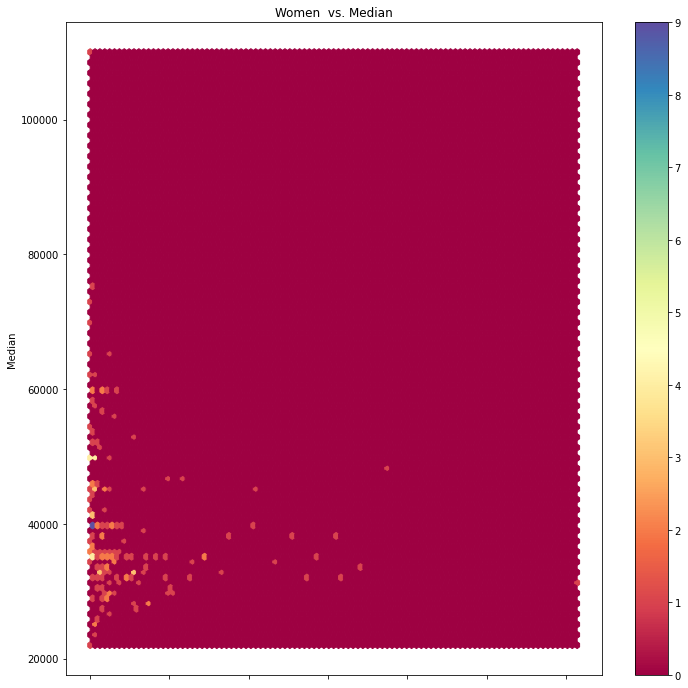

In [31]:
ax = recent_grads.plot(x='Women', y='Median', kind='hexbin', cmap = 'Spectral', alpha = 1, figsize=(12,12))
ax.set_title('Women  vs. Median');

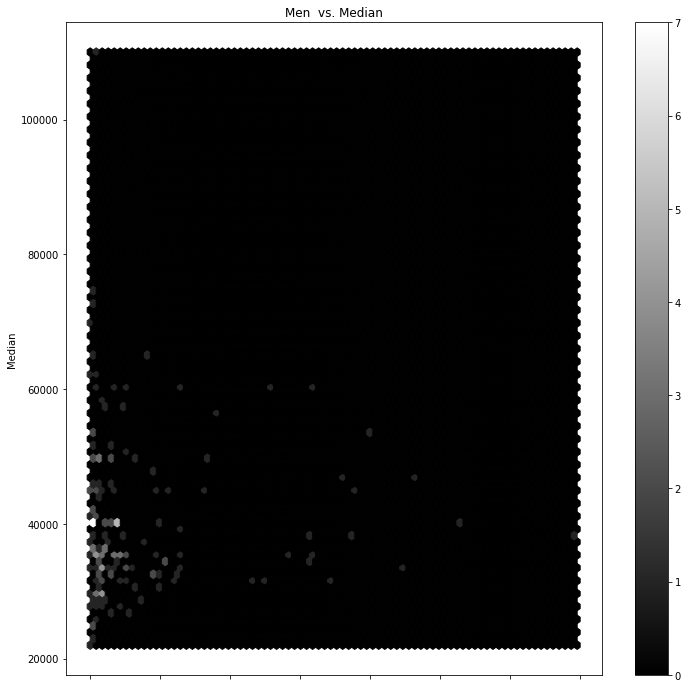

In [32]:
ax = recent_grads.plot(x='Men', y='Median', kind='hexbin', cmap='gist_gray', 
                       gridsize=81, alpha = 1, figsize=(12,12))
ax.set_title('Men  vs. Median');

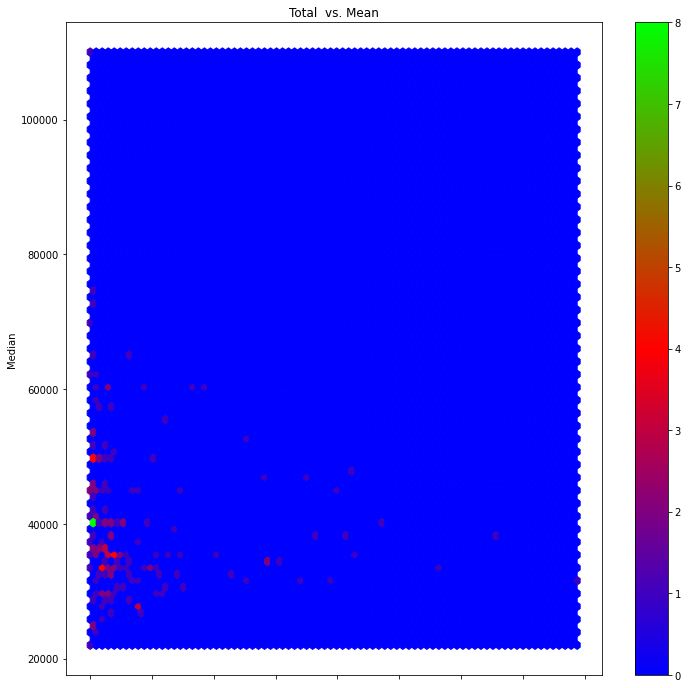

In [33]:
ax = recent_grads.plot(x='Total', y='Median', kind='hexbin',
                       gridsize=81, cmap = 'brg',  alpha = 1, figsize=(12,12))
ax.set_title('Total  vs. Mean');

As we see in all these cases the most of recently graduated  have annual earing less or equal 40K USD. Hexagon bin plot has more visual clearness that simple histogram.

**7. Most popular and unpopular specialization for man and vomen and specializtion with highest 
unemployed ratio**

Define required variable  


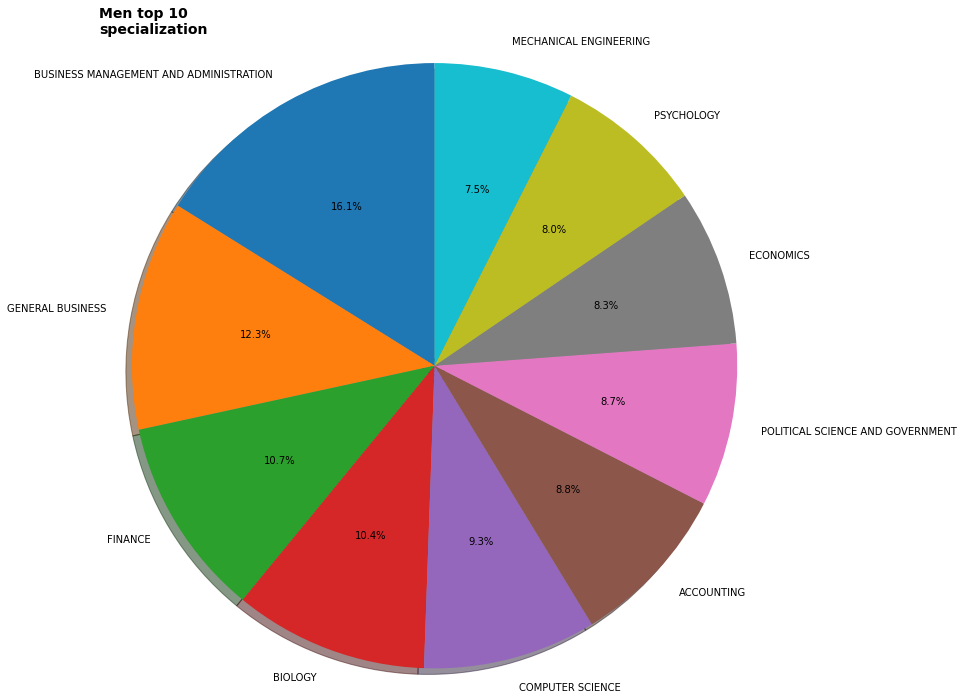

In [34]:
sorted_man = recent_grads.sort_values(['Men'], ascending=[False])
man_top_10 = recent_grads.sort_values(['Men'], ascending=[False])[0:10]

fig, ax = plt.subplots(figsize=(12,12))
ax.pie(man_top_10['Men'], labels=man_top_10['Major'], autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Men top 10 \nspecialization',  loc = 'left', fontsize = 14, fontweight = 'bold');

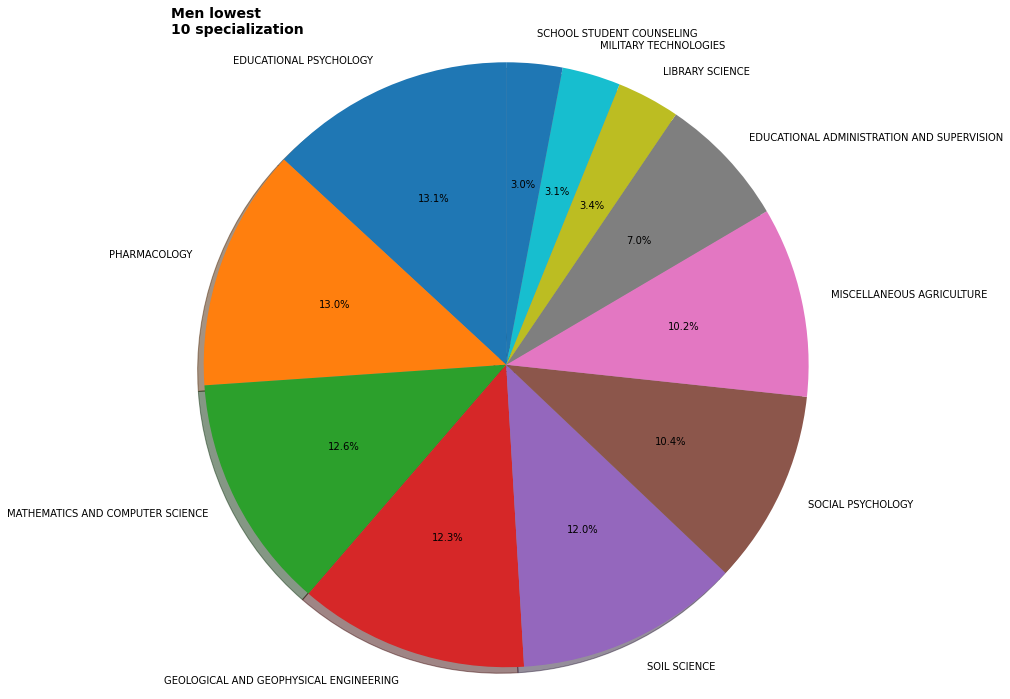

In [35]:
man_low_10 = recent_grads.sort_values(['Men'], ascending=[False])[-11:]
# low_10 for men
fig, ax = plt.subplots(figsize=(12,12))
ax.pie(man_low_10['Men'], labels=man_low_10['Major'], autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Men lowest \n10 specialization', loc = 'left', fontsize = 14, fontweight = 'bold');

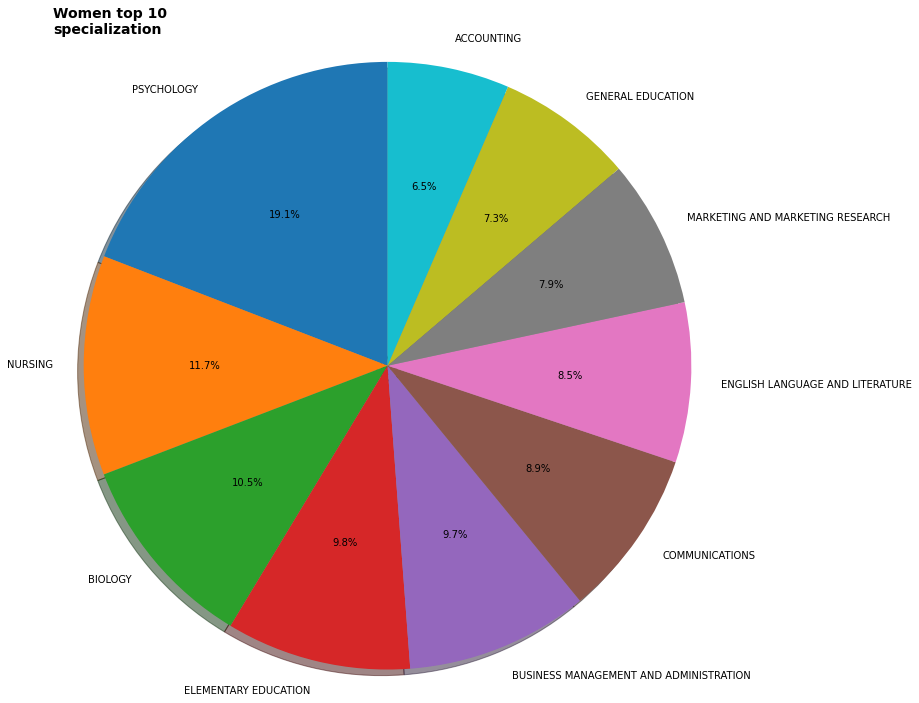

In [36]:
woman_top_10 = recent_grads.sort_values(['Women'], ascending=[False])[0:10]
fig, ax = plt.subplots(figsize=(12,12))
ax.pie(woman_top_10['Women'], labels=woman_top_10['Major'], autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Women top 10 \nspecialization', loc = 'left', fontsize = 14, fontweight = 'bold');

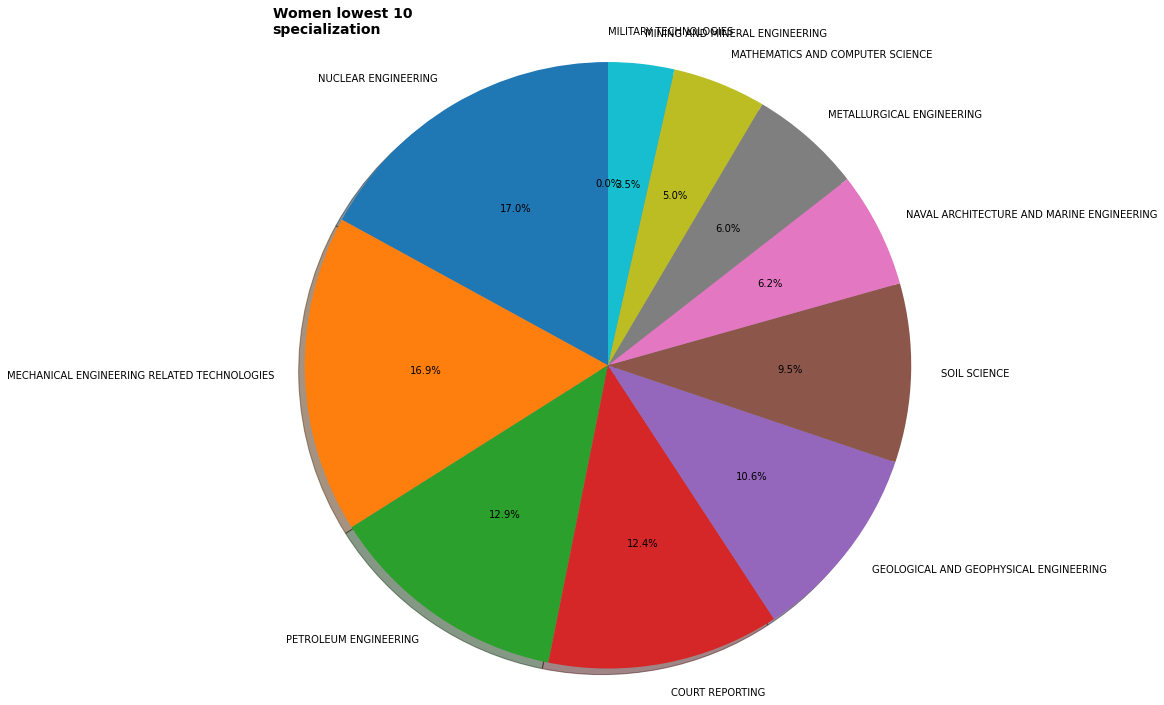

In [37]:
woman_low_10 = recent_grads.sort_values(['Women'], ascending=[False])[-11:]
fig, ax = plt.subplots(figsize=(12,12))
ax.pie(woman_low_10['Women'], labels=woman_low_10['Major'], autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Women lowest 10 \nspecialization', loc = 'left', fontsize = 14, fontweight = 'bold');

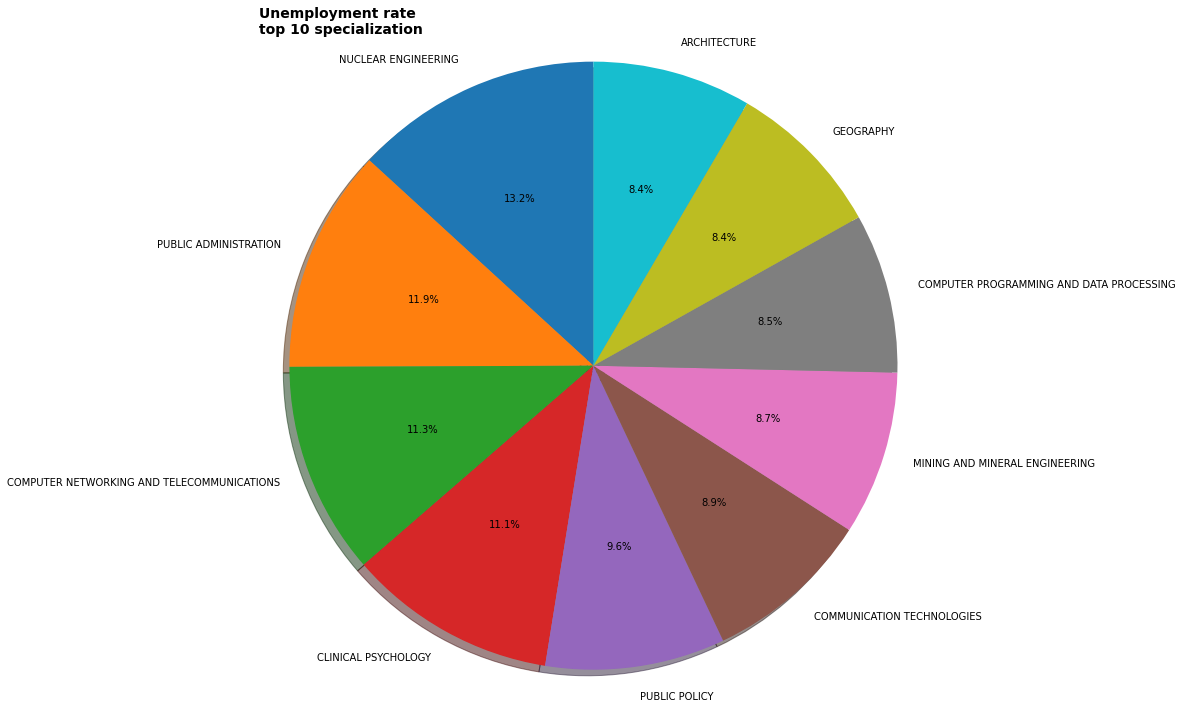

In [38]:
unemply_high_10 = recent_grads.sort_values(['Unemployment_rate'], ascending=[False])[0:10]
fig, ax = plt.subplots(figsize=(12,12))
ax.pie(unemply_high_10['Unemployment_rate'], labels=unemply_high_10['Major'], autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Unemployment rate \ntop 10 specialization', loc = 'left', fontsize = 14, fontweight = 'bold');

# Conclusions 
To conclude, let's return to the questions we asked earlier and try to answer them:

* **1.Do students in more popular majors make more money?**


The bar plots show that there hasn't direct  correlation between that popular majors category earn more money except Business because  highest median salary category (except Business) have only  STEM and Law & Publicity and their category  are not popular for recent graduated. May be STEM and Law & Publicity  have high education cost than other?

* **2.Do students that majored in subjects that were majority female make more money?**

No, as we see at the bar plots women generally dominate in the major category with earning or meadian 40K USD or lowest the median annual earing. 


* **3. Is there any link between the number of full-time employees and median salary?**

No, as we see at the histograms the  annual earing most of recently graduated  working full or part time   lowest or equal 40K USD. 


* **4. Man and women dominating**

As we see are major category where dominate man and are category where dominate women. Women and men are almost equal in the Business and law and public policy. General trend - man prefer STEM, women - humanitarian disciplines.


* **5. Median annual earing**

Us wee see, the annual earing the most of recently graduated equal or lowest 40K USD. I we take away taxes possible mortgage, education loans, health insurance,  kindergarten - as a result, not a very large amount of money remains.


* **6. Top 10 Unemployment** 

I surprised the highest level of Unemployment in specialization with highest annual earing from STEM 
under  a deficit of people in IT. Possible reasons - or low education level for part of recently graduated, or part of recently graduated decided work in the  other areas of specialization.


* **7. Plenty of zero values**

As we see ratio of zero values in certain columns is in range 40 - 90 percents, that induce general questions for quality, methodology and authenticity this survey or dataset.

Created on Feb 07, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment:

Debian 10.7

Python 3.8.7

required  next preinstalled python modules:

numpy

pandas

matplotlib